In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

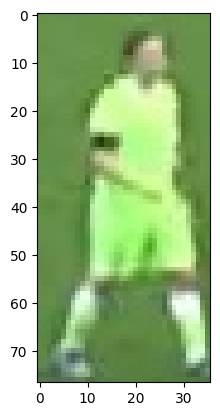

In [3]:
plt.imshow(image)

### only taking top half of the image

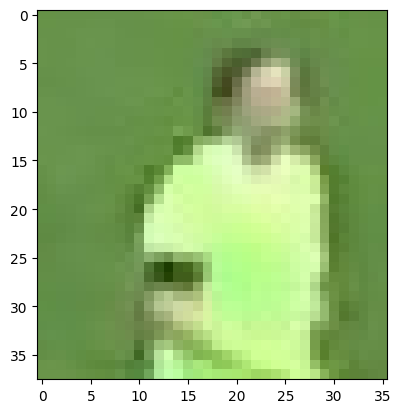

In [4]:
top_half = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half)

### cluster the image into 2 clusturs

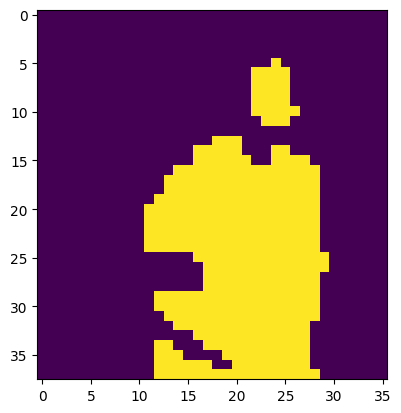

In [8]:
#reshaping the image in 2D array
image_2d = top_half.reshape(-1, 3)

#performing k-means clustering with 2 clusturs
Kmeans = KMeans(n_clusters=2)
Kmeans.fit(image_2d)

#getting the labels
labels = Kmeans.labels_

#reshape the labels to the original image shape
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()

In [9]:
corner_clusture = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_clusture = max(set(corner_clusture), key=corner_clusture.count)
player_clusture = 1-non_player_clusture

In [10]:
Kmeans.cluster_centers_[player_clusture]

array([199.2408377 , 240.04450262, 153.33769634])